## VISUALIZACI√ìN DE LOS DATOS

El objetivo es proporcionar a ABC Corporation un informe detallado del contexto general de la empresa utilizando visualizaciones en Python junto con an√°lisis descriptivos donde se resaltaremos tendencias, √°reas de mejora y fortalezas dentro de la empresa. Este informe permitir√° una comprensi√≥n m√°s profunda de la situaci√≥n actual y servir√° como base para la toma de decisiones informadas.


In [1]:
# importamos las librer√≠as que necesitaremos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaci√≥n de datos en gr√°ficas
# -----------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribuci√≥n de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest


# Configuraci√≥n
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [2]:
df = pd.read_csv("CSV_LIMPIADO.csv", index_col=0)
df.head(2)

attrition businesstravel  dailyrate department  distancefromhome  \
age                                                                    
51         no            NaN    2015.72        NaN                 6   
52         no            NaN    2063.39        NaN                 1   

     education educationfield  employeecount  employeenumber  \
age                                                            
51           3            NaN              1               1   
52           4  life sciences              1               2   

     environmentsatisfaction gender  hourlyrate  jobinvolvement  joblevel  \
age                                                                         
51                         1   male         NaN               3         5   
52                         3   male         NaN               2         5   

               jobrole  jobsatisfaction maritalstatus  monthlyincome  \
age                                                                    
51   research director                3           NaN       16280.83   
52             manager                3           NaN            NaN   

     monthlyrate  numcompaniesworked over18 overtime  percentsalaryhike  \
age                                                                       
51      42330.17                   7      y       no                 13   
52      43331.17                   0      y      NaN                 14   

     performancerating  relationshipsatisfaction standardhours  \
age                                                              
51                 3.0                         3     full time   
52                 3.0                         1           NaN   

     stockoptionlevel  totalworkingyears  trainingtimeslastyear  \
age                                                               
51                  0                NaN                      5   
52                  1               34.0                      5   

     worklifebalance  yearsatcompany  yearsincurrentrole  \
age                                                        
51               3.0              20                 NaN   
52               3.0              33                 NaN   

     yearssincelastpromotion  yearswithcurrmanager  sameasmonthlyincome  \
age                                                                       
51                        15                    15             16280.83   
52                        11                     9                  NaN   

     datebirth    salary roledepartament  numberchildren remotework  
age                                                                  
51        1972  195370.0             NaN             NaN        yes  
52        1971  199990.0             NaN             NaN        yes

In [3]:
print(f"El n√∫mero de filas que tenemos es {df.shape[0]}, y el n√∫mero de columnas es {df.shape[1]}")
print("Nota: La columna Age no se cuenta en .shape porque es el √≠ndice, pero tambi√©n forma parte del DataFrame.")

El n√∫mero de filas que tenemos es 1678, y el n√∫mero de columnas es 40
Nota: La columna Age no se cuenta en .shape porque es el √≠ndice, pero tambi√©n forma parte del DataFrame.


In [4]:
df = df.reset_index()

In [5]:
df.head(2)

age attrition businesstravel  dailyrate department  distancefromhome  \
0   51        no            NaN    2015.72        NaN                 6   
1   52        no            NaN    2063.39        NaN                 1   

   education educationfield  employeecount  employeenumber  \
0          3            NaN              1               1   
1          4  life sciences              1               2   

   environmentsatisfaction gender  hourlyrate  jobinvolvement  joblevel  \
0                        1   male         NaN               3         5   
1                        3   male         NaN               2         5   

             jobrole  jobsatisfaction maritalstatus  monthlyincome  \
0  research director                3           NaN       16280.83   
1            manager                3           NaN            NaN   

   monthlyrate  numcompaniesworked over18 overtime  percentsalaryhike  \
0     42330.17                   7      y       no                 13   
1     43331.17                   0      y      NaN                 14   

   performancerating  relationshipsatisfaction standardhours  \
0                3.0                         3     full time   
1                3.0                         1           NaN   

   stockoptionlevel  totalworkingyears  trainingtimeslastyear  \
0                 0                NaN                      5   
1                 1               34.0                      5   

   worklifebalance  yearsatcompany  yearsincurrentrole  \
0              3.0              20                 NaN   
1              3.0              33                 NaN   

   yearssincelastpromotion  yearswithcurrmanager  sameasmonthlyincome  \
0                       15                    15             16280.83   
1                       11                     9                  NaN   

   datebirth    salary roledepartament  numberchildren remotework  
0       1972  195370.0             NaN             NaN        yes  
1       1971  199990.0             NaN             NaN        yes

In [6]:
print(f"El n√∫mero de filas que tenemos es {df.shape[0]}, y el n√∫mero de columnas es {df.shape[1]}")

El n√∫mero de filas que tenemos es 1678, y el n√∫mero de columnas es 41


### ENFOQUE GENERAL DE LA EMPRESA

Se valorar√°n datos demogr√°ficos de los 1614 empleados de la empresa ABC Corporation en el conjunto de datos, revisando su edad media, g√©nero, edad media por g√©nero, nivel formativo en general, nivel formativo por g√©nero y su estado civil.

### N√∫mero de empleados

La empresa tiene 1614 empleados

In [7]:
df['employeenumber'].unique()

array([   1,    2,    3, ..., 1612, 1613, 1614], shape=(1614,))

In [8]:
df['employeenumber'].duplicated().sum()
# tenemos 64 registros duplicados (m√°s de una consulta por empleado)

np.int64(64)

In [9]:
df_sin_duplicados = df.drop_duplicates(subset='employeenumber')
# eliminamos los duplicados por asegurarnos

In [10]:
df_sin_duplicados.duplicated().sum()

np.int64(0)

In [11]:
df_sin_duplicados['employeenumber'].unique()

array([   1,    2,    3, ..., 1612, 1613, 1614], shape=(1614,))

### EDAD MEDIA DE LOS EMPLEADOS

La edad media de los empleados es de casi 37 a√±os (36,92), con empleados entre los 18 a√±os y los 60 a√±os de m√°ximo.

In [12]:
df_sin_duplicados['age'].describe()

count    1614.000000
mean       36.920694
std         9.102157
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: age, dtype: float64

Text(0.5, 1.0, 'Histplot con el N√∫mero de empleados por edad')

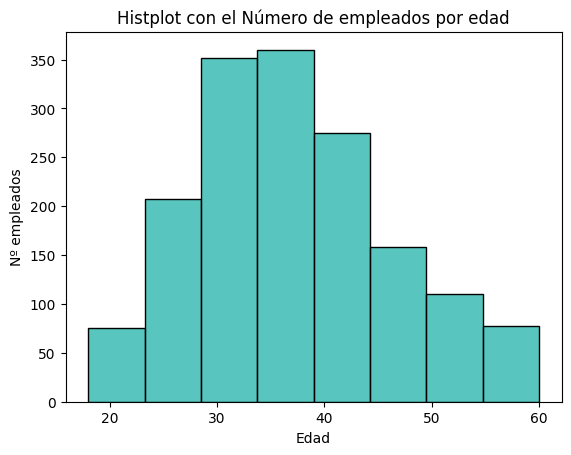

In [13]:
sns.histplot(data=df_sin_duplicados, x='age', bins=8, color='lightseagreen')
plt.xlabel("Edad")
plt.ylabel("N¬∫ empleados")
plt.title('Histplot con el N√∫mero de empleados por edad', fontsize=12)

### G√âNERO DE LOS EMPLEADOS

El g√©nero de los empleados es mayoritariamente masculino (60,16%), con 971 hombres y 643 mujeres.

In [14]:
df_sin_duplicados['gender'].value_counts()

gender
male      971
female    643
Name: count, dtype: int64

In [15]:
round(df_sin_duplicados['gender'].value_counts(normalize=True) * 100, 2)

gender
male      60.16
female    39.84
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Countplot con el N√∫mero de empleados por g√©nero')

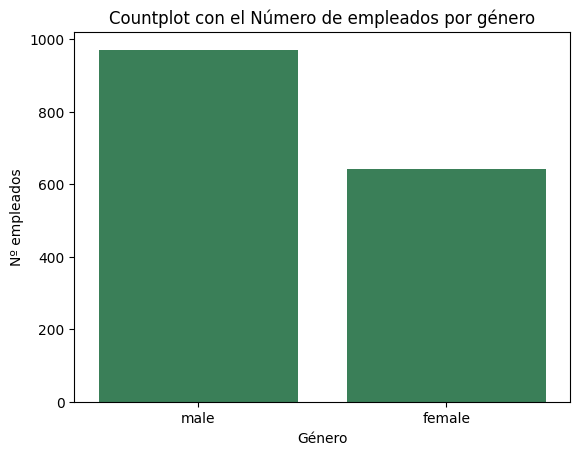

In [16]:
sns.countplot(data=df_sin_duplicados, x='gender', color='seagreen')
plt.xlabel("G√©nero")
plt.ylabel("N¬∫ empleados")
plt.title('Countplot con el N√∫mero de empleados por g√©nero', fontsize=12)

### EDAD MEDIA POR G√âNERO DE LOS EMPLEADOS

La edad media de los empleados por g√©nero es casi la misma, con una edad media de 36,7 a√±os los hombres y con una media de 37,26 a√±os las mujeres.

In [17]:
df_sin_duplicados.groupby('gender')['age'].mean()

gender
female    37.259720
male      36.696189
Name: age, dtype: float64

In [18]:
df_g√©nero_edad = round(df_sin_duplicados.groupby('gender')['age'].mean(), 2).reset_index()
df_g√©nero_edad

gender    age
0  female  37.26
1    male  36.70

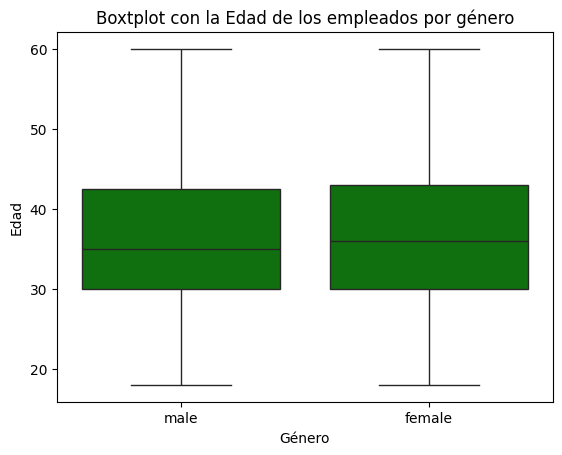

In [19]:
sns.boxplot(x='gender', y='age', data=df_sin_duplicados, color='green')
plt.xlabel("G√©nero")
plt.ylabel("Edad")
plt.title('Boxtplot con la Edad de los empleados por g√©nero', fontsize=12);

### NIVEL FORMATIVO DE LOS EMPLEADOS

El nivel formativo de los empleados es principalmente Desconocido (745 empleados), sigui√©ndole life sciences (349 empleados), medical (276 empleados), marketing (104 empleados), technical degree (69 empleados), other (59 empleados) y human resources (12 empleados).

In [20]:
df_sin_duplicados['educationfield'].unique()

array([nan, 'life sciences', 'technical degree', 'medical', 'other',
       'marketing', 'human resources'], dtype=object)

In [21]:
df_sin_duplicados['educationfield'].describe()

count               869
unique                6
top       life sciences
freq                349
Name: educationfield, dtype: object

In [22]:
df_sin_duplicados['educationfield'].value_counts()

educationfield
life sciences       349
medical             276
marketing           104
technical degree     69
other                59
human resources      12
Name: count, dtype: int64

Text(0.5, 1.0, 'Countplot con el N√∫mero de empleados por nivel formativo')

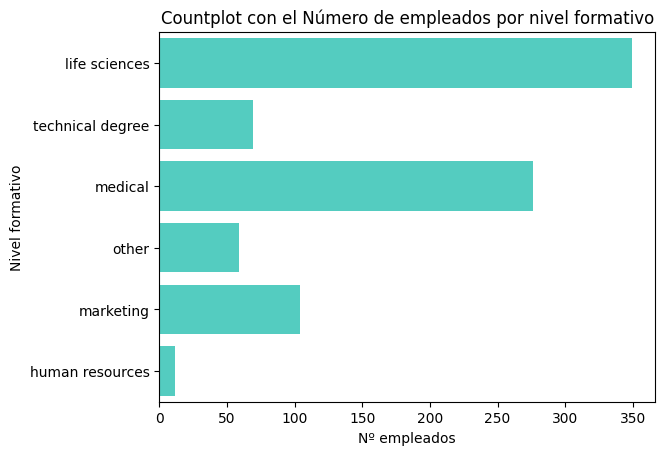

In [23]:
sns.countplot(data=df_sin_duplicados, y='educationfield', color='turquoise')
plt.xlabel("N¬∫ empleados")
plt.ylabel("Nivel formativo")
plt.title('Countplot con el N√∫mero de empleados por nivel formativo', fontsize=12)

## üè¢ Departamentos y Puestos

La empresa est√° compuesta por 3 departamentos principales con una amplia variedad de roles.

**Departamentos:**

- Research & Development
- Sales
- Human Resources

**Puestos destacados en m√∫ltiples departamentos:**

- Manager
- Research Director
- Laboratory Technician
- Sales Executive
- Human Resources Coordinator

## üíº Salario por Departamento y Rol

El salario medio por departamento no presenta diferencias extremas.

**Sin embargo:**

- Los Managers tienen salarios significativamente m√°s altos que el resto.
- El rol de Research Director tambi√©n destaca por tener un sueldo elevado, aunque no sea un puesto de gesti√≥n formal.

C:\Users\SOL\AppData\Local\Temp\ipykernel_13332\1434841671.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0, 0.5, 'Salario medio')

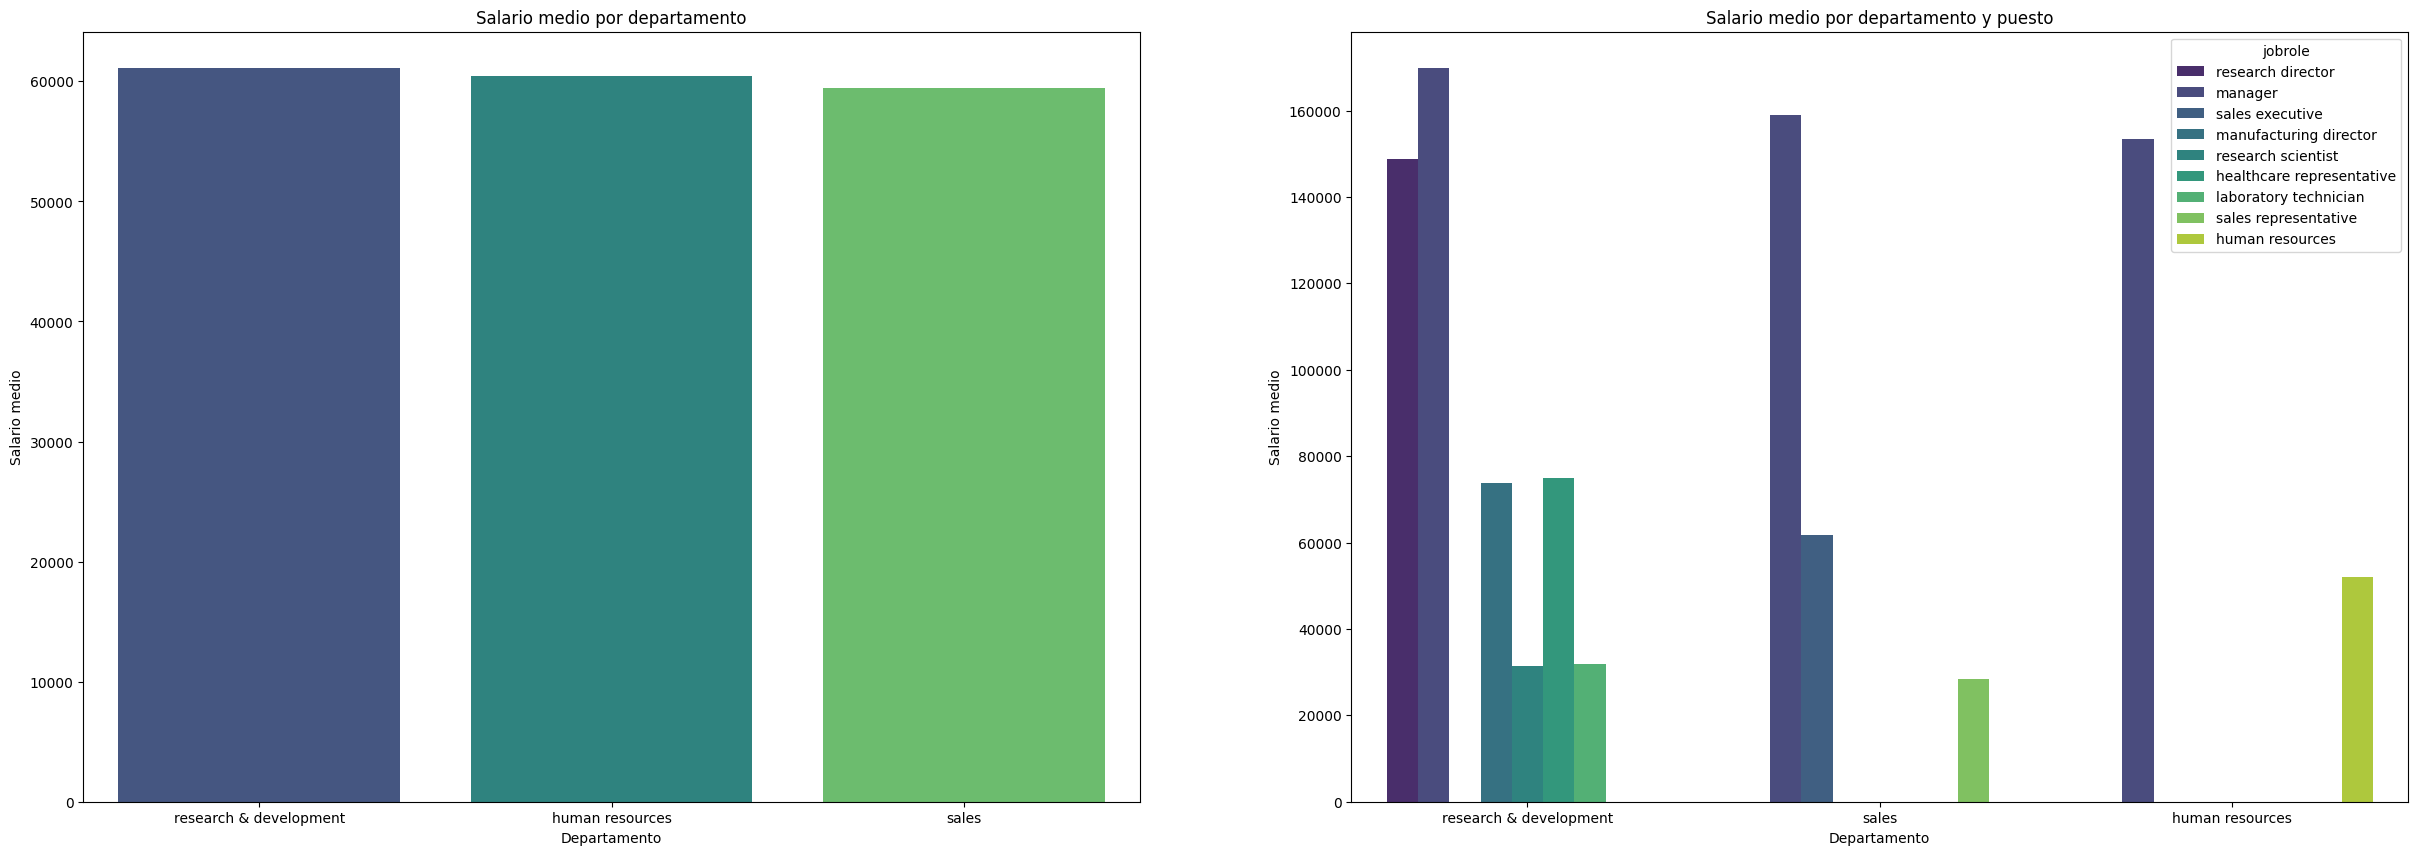

In [24]:
orden = df_sin_duplicados.groupby("department")["salary"].mean().sort_values(ascending=False).index
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (30, 10))
sns.barplot(x="department", 
            y="salary",
            data=df_sin_duplicados,
            hue='jobrole', 
            errorbar=None,
            palette="viridis",
            ax = axes[1]) 
axes[1].set_title("Salario medio por departamento y puesto")
axes[1].set_xlabel("Departamento")
axes[1].set_ylabel("Salario medio")

sns.barplot(
    x="department", 
    y="salary", 
    data=df_sin_duplicados, 
    errorbar=None,    
    order=orden,     
    palette="viridis", 
    ax = axes[0])
axes[0].set_title("Salario medio por departamento")
axes[0].set_xlabel("Departamento")
axes[0].set_ylabel("Salario medio")

## üë©‚Äçüíºüë®‚Äçüíº G√©nero y Salario

En la mayor√≠a de los departamentos, el salario medio entre hombres y mujeres es similar.

**Excepci√≥n importante:**

- En el departamento de Recursos Humanos, las mujeres ganan menos que los hombres de forma significativa.

Text(0, 0.5, 'salario')

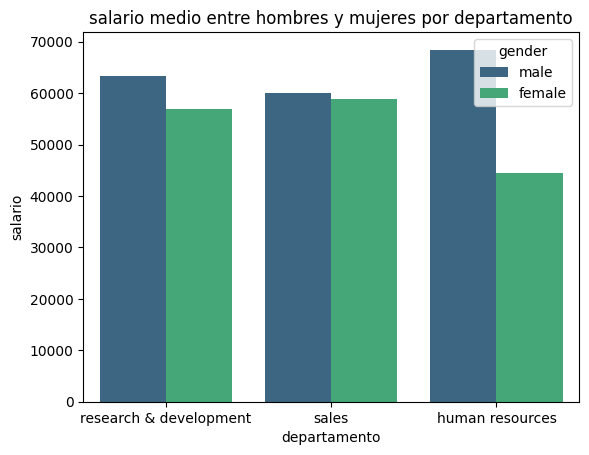

In [25]:
sns.barplot(x="department", 
            y="salary",
            data=df_sin_duplicados,
            hue='gender', 
            errorbar=None,
            palette="viridis")
plt.title("salario medio entre hombres y mujeres por departamento")
plt.xlabel("departamento")
plt.ylabel("salario")

## üéì Nivel Educativo y Salario

El nivel educativo se mide en una escala de 1 a 5 (1 = menor nivel, 5 = nivel m√°s alto).

Existe una correlaci√≥n positiva clara:

- A mayor nivel educativo, mayor es el salario promedio.

Text(0, 0.5, 'salario')

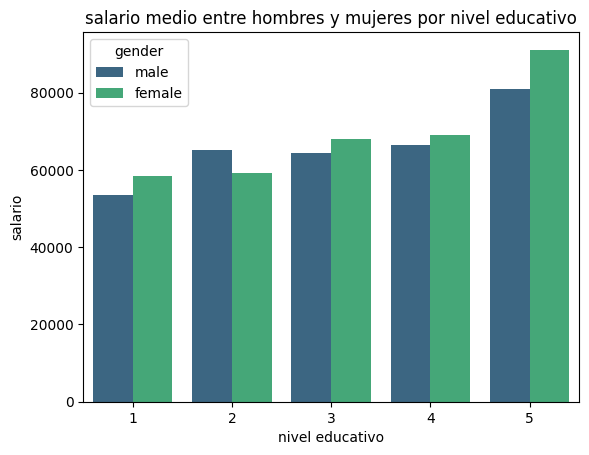

In [26]:
sns.barplot(x="education", 
            y="salary",
            data=df_sin_duplicados,
            hue='gender',
            estimator='mean', 
            errorbar=None,
            palette="viridis")
plt.title("salario medio entre hombres y mujeres por nivel educativo")
plt.xlabel("nivel educativo")
plt.ylabel("salario")

## üè† Distancia al Trabajo

- 38.4% de los empleados vive a 5 millas o menos del trabajo.
- 61.6% vive a m√°s de 5 millas, lo que puede afectar:
  - Bienestar
  - Productividad
  - Rotaci√≥n

C:\Users\SOL\AppData\Local\Temp\ipykernel_13332\811048589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_duplicados["distancia_categoria"] = df_sin_duplicados["distancefromhome"].apply(lambda x: "Cerca" if x <= 5 else "Lejos")


Text(0.5, 1.0, 'Distribuci√≥n de empleados seg√∫n la distancia al trabajo')

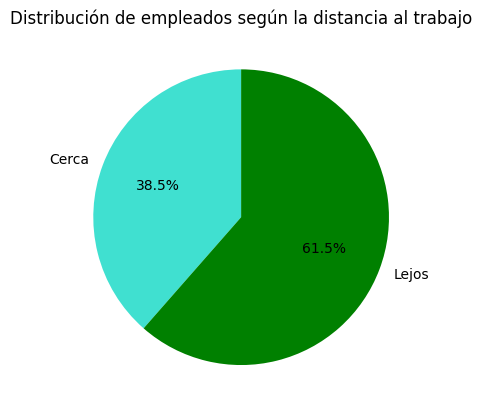

In [27]:
df_sin_duplicados["distancia_categoria"] = df_sin_duplicados["distancefromhome"].apply(lambda x: "Cerca" if x <= 5 else "Lejos")
df_distancia = df_sin_duplicados.groupby("distancia_categoria")["employeecount"].count().reset_index()
import matplotlib.pyplot as plt

colores = ['turquoise', 'green']

plt.pie(
    df_distancia["employeecount"], 
    labels=df_distancia["distancia_categoria"],
    autopct='%1.1f%%', 
    colors=colores, 
    textprops={'fontsize': 10}, 
    startangle=90
)
plt.title("Distribuci√≥n de empleados seg√∫n la distancia al trabajo")

## ‚è≥ Antig√ºedad en la Empresa

- 13.6% lleva menos de 2 a√±os.
- 69.9% lleva entre 2 y 10 a√±os.
- 16.5% lleva m√°s de 10 a√±os, y este grupo recibe el salario m√°s alto en promedio.

In [28]:
def clasificar_antiguedad(x):
    if x < 2:
        return "Menos de 2 a√±os"
    elif x <= 10:
        return "De 2 a 10 a√±os"
    else:
        return "M√°s de 10 a√±os"

df_sin_duplicados["antiguedad_categoria"] = df_sin_duplicados["yearsatcompany"].apply(clasificar_antiguedad)

C:\Users\SOL\AppData\Local\Temp\ipykernel_13332\3609187049.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_duplicados["antiguedad_categoria"] = df_sin_duplicados["yearsatcompany"].apply(clasificar_antiguedad)


Text(0.5, 1.0, 'Distribuci√≥n de empleados por antig√ºedad en la empresa')

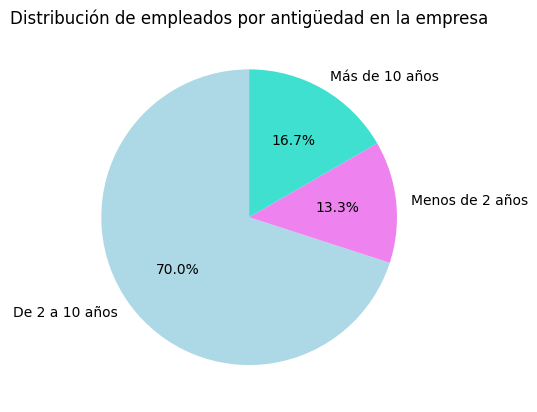

In [29]:
df_antiguedad = df_sin_duplicados.groupby("antiguedad_categoria")["employeecount"].count().reset_index()
colores = ['lightblue', 'violet', 'turquoise']

plt.pie(
    df_antiguedad["employeecount"],
    labels=df_antiguedad["antiguedad_categoria"],
    autopct='%1.1f%%',
    colors=colores,
    textprops={'fontsize': 10},
    startangle=90
)
plt.title("Distribuci√≥n de empleados por antig√ºedad en la empresa")

## üñ•Ô∏è Teletrabajo

- 62.1% de los empleados trabaja en remoto.
- 37.9% no teletrabaja, lo que podr√≠a estar vinculado a:
  - La naturaleza del puesto
  - Pol√≠ticas internas del √°rea
## ¬øDel 61.5% que vive a m√°s de 5 millas, cu√°ntos teletrabajan?
Empleados que viven a m√°s de 5 millas y s√≠ teletrabajan: 596

Porcentaje dentro de los que viven lejos: ‚âà 60.02%

‚úîÔ∏è Entonces s√≠, aproximadamente el 60% de quienes viven lejos est√°n teletrabajando, lo cual puede ayudar a compensar esa distancia.

(np.float64(-1.099999174814268),
 np.float64(1.099995152177627),
 np.float64(-1.0999983253706687),
 np.float64(1.0999999202557462))

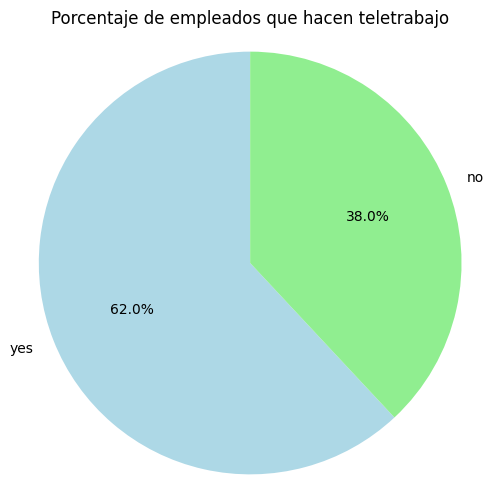

In [30]:
remote_counts = df_sin_duplicados['remotework'].value_counts()
import matplotlib.pyplot as plt

labels = remote_counts.index
sizes = remote_counts.values
colors = ['lightblue', 'lightgreen']  

plt.figure(figsize=(6, 6))
plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors, 
    textprops={'fontsize': 10}
)
plt.title("Porcentaje de empleados que hacen teletrabajo")
plt.axis('equal')  # Hace el gr√°fico circular

## üß† Experiencia Media

Hombres y mujeres tienen una experiencia laboral media similar: ~11 a√±os.

Con la experiencia aumenta:

- Salario
- Nivel del puesto

C:\Users\SOL\AppData\Local\Temp\ipykernel_13332\531960543.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\SOL\AppData\Local\Temp\ipykernel_13332\531960543.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


([0, 1, 2],
 [Text(0, 0, 'M√°s de 10 a√±os'),
  Text(1, 0, 'De 2 a 10 a√±os'),
  Text(2, 0, 'Menos de 2 a√±os')])

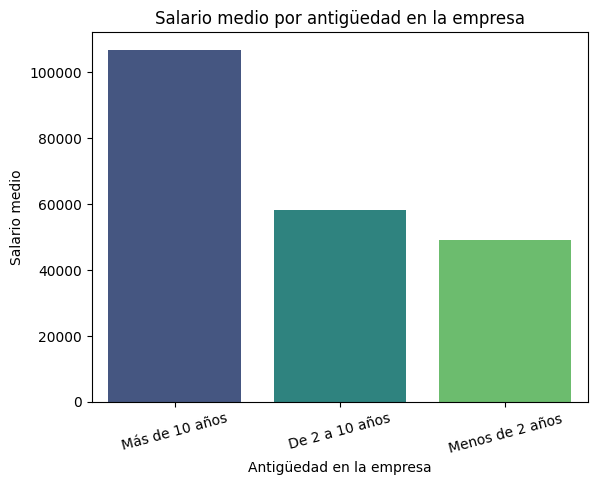

In [31]:
sns.barplot(
    x="antiguedad_categoria",
    y="salary",
    data=df_sin_duplicados,
    estimator="mean",
    ci=None,
    palette="viridis"  # puedes cambiar a otro como 'magma', 'Set2', etc.
)
plt.title("Salario medio por antig√ºedad en la empresa")
plt.xlabel("Antig√ºedad en la empresa")
plt.ylabel("Salario medio")
plt.xticks(rotation=15)

## üìà Evaluaci√≥n del Desempe√±o vs. Entrenamiento

No se observa una correlaci√≥n significativa entre:

- Las sesiones de entrenamiento y la evaluaci√≥n del desempe√±o.
- La formaci√≥n recibida y el salario obtenido.

Text(0, 0.5, 'Promedio de sesiones de entrenamiento')

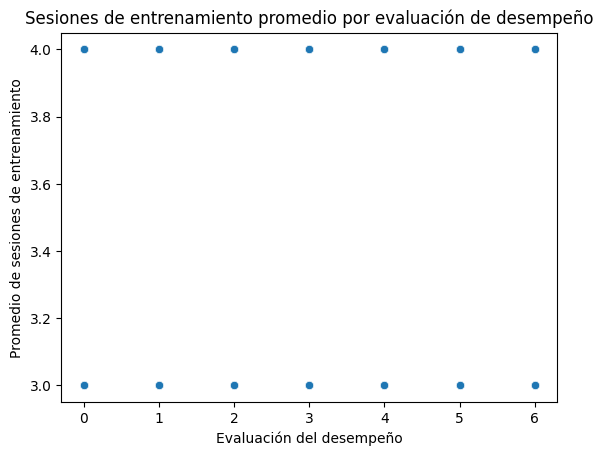

In [32]:
sns.scatterplot(
    x='trainingtimeslastyear',
    y='performancerating',
    data=df
)
plt.title('Sesiones de entrenamiento promedio por evaluaci√≥n de desempe√±o')
plt.xlabel('Evaluaci√≥n del desempe√±o')
plt.ylabel('Promedio de sesiones de entrenamiento')

In [33]:
df['attrition'] = df['attrition'].map({'no': 'Permanece', 'yes': 'Se fue'})
df['remotework'] = df['remotework'].map({'no': 'No', 'yes': 'S√≠'})
df['gender'] = df['gender'].str.capitalize()
df['department'] = df['department'].str.strip().str.capitalize()
df['yearsincurrentrole'] = pd.to_numeric(df['yearsincurrentrole'], errors='coerce')

# JOB SATISFACTION

## ESTAD√çSTICAS PRINCIPALES

Media de jobsatisfaction: 2.74/4

Media de jobsatisfaction por g√©nero: mujeres: 2.69/4, hombres: 2.77/4

Media de jobsatisfaction por departamento: HR = 2.31/4, Research & Development = 2.86/4, Sales = 2.72/4

In [34]:
media = df['jobsatisfaction'].mean()
media

np.float64(2.743146603098927)

In [35]:
media_por_genero = df.groupby('gender')['jobsatisfaction'].mean()
print(media_por_genero)

gender
Female    2.690583
Male      2.777998
Name: jobsatisfaction, dtype: float64


In [36]:
media_por_genero = df.groupby('remotework')['jobsatisfaction'].mean()
print(media_por_genero)

remotework
No    2.688679
S√≠    2.776392
Name: jobsatisfaction, dtype: float64


## JOB SATISFACTION POR G√âNERO

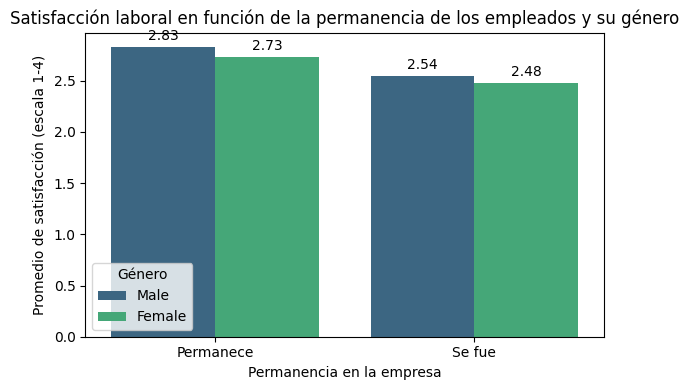

In [37]:


# Subconjunto con columnas necesarias
satisfaction_cols = [
    'attrition', 'gender', 'jobsatisfaction'
]
df_sat = df[satisfaction_cols].dropna()

plt.figure(figsize=(6, 4))
ax = sns.barplot(  # ‚Üê asignamos a ax
    data=df_sat,
    x='attrition',
    y='jobsatisfaction',
    hue='gender',
    palette='viridis',
    errorbar=None
)

plt.title("Satisfacci√≥n laboral en funci√≥n de la permanencia de los empleados y su g√©nero")
plt.xlabel("Permanencia en la empresa")
plt.ylabel("Promedio de satisfacci√≥n (escala 1-4)")
plt.legend(title='G√©nero')

# A√±adir etiquetas con valores a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

Conclusi√≥n: La satisfacci√≥n tiende a ser m√°s baja entre los empleados que ya no trabajan en la empresa, independientemente del g√©nero.

## JOB SATISFACTION POR SALARIO

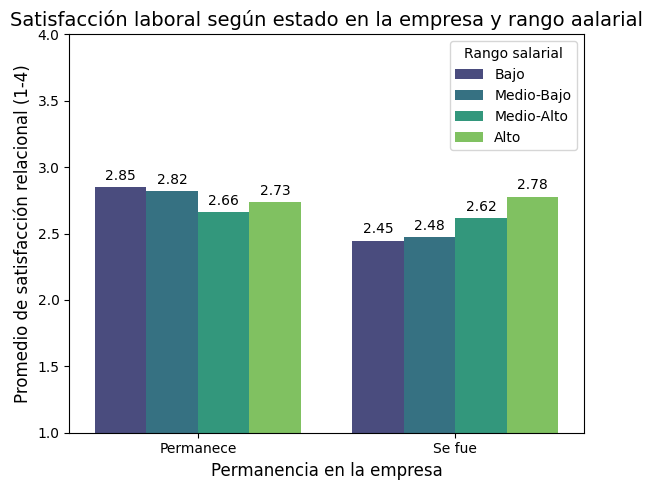

In [38]:
# Agrupar los salarios
df['salary_range'] = pd.qcut(df['salary'], q=4, labels=['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto'])

# Eliminar filas con valores nulos en las columnas necesarias
df_salary = df[['attrition', 'salary_range', 'jobsatisfaction']].dropna()

# Gr√°fico de barras
plt.figure(figsize=(6,5))
ax = sns.barplot(
    data=df_salary,
    x='attrition',
    y='jobsatisfaction',
    hue='salary_range',
    palette='viridis', 
    errorbar=None
)

# A√±adir etiquetas con valores a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

# Personalizar gr√°fico
ax.set_title("Satisfacci√≥n laboral seg√∫n estado en la empresa y rango aalarial", fontsize=14)
ax.set_xlabel("Permanencia en la empresa", fontsize=12)
ax.set_ylabel("Promedio de satisfacci√≥n relacional (1-4)", fontsize=12)
ax.legend(title='Rango salarial')
ax.set_ylim(1, 4)  # Fijamos los l√≠mites del eje Y para mejorar la comparaci√≥n

plt.tight_layout()
plt.show()

Quienes permanecen generalmente muestran una mayor satisfacci√≥n con el trabajo, salvo en los casos de aquellos empleados que ten√≠an los salarios m√°s altos.

## JOB SATISFACTION POR DEPARTAMENTO

In [1]:

# Limpiar valores para visualizaci√≥n
df['department'] = df['department'].str.strip().str.capitalize()

# Seleccionar columnas necesarias y quitar nulos
df_dep = df[['attrition', 'department', 'jobsatisfaction']].dropna()

# Crear gr√°fico
plt.figure(figsize=(6,5))
ax = sns.barplot(
    data=df_dep,
    x='department',
    y='jobsatisfaction',
    hue='attrition',
    palette='viridis',
    errorbar=None
)

# A√±adir etiquetas con valores a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

# T√≠tulos y etiquetas
ax.set_title("Satisfacci√≥n laboral por departamento y estatus de permanencia en la empresa", fontsize=14)
ax.set_xlabel("Departamento", fontsize=10)
ax.set_ylabel("Promedio de satisfacci√≥n con el trabajo", fontsize=10)
ax.legend(title='Attrition')

# Rotar etiquetas si es necesario
plt.xticks(rotation=45)

# Mostrar gr√°fico
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

La satisfacci√≥n con el trabajo es considerablemente m√°s baja entre los empleados inactivos en el departamento de HR y mucho menos notable en el de Ventas. En el Departamento de Investigaci√≥n y Desarrollo, sin embargo, los empleados inactivos muestran una mejor satisfacci√≥n con el trabajo que los activos.

## JOB SATISFACTION POR A√ëOS EN EL PUESTO

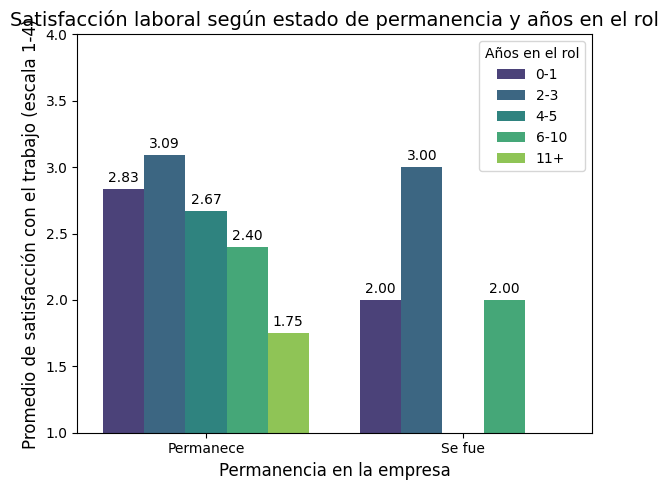

In [40]:

df['yearsincurrentrole'] = pd.to_numeric(df['yearsincurrentrole'], errors='coerce')

# Crear categor√≠as por a√±os en el rol
df['a√±os_en_rol'] = pd.cut(
    df['yearsincurrentrole'],
    bins=[-1, 1, 3, 5, 10, df['yearsincurrentrole'].max()],
    labels=['0-1', '2-3', '4-5', '6-10', '11+']
)

# Filtrar y limpiar
df_role = df[['attrition', 'a√±os_en_rol', 'jobsatisfaction']].dropna()

# Crear gr√°fico
plt.figure(figsize=(6,5))
ax = sns.barplot(
    data=df_role,
    x='attrition',
    y='jobsatisfaction',
    hue='a√±os_en_rol',
    palette='viridis',
    errorbar=None
)

# A√±adir etiquetas con valores a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

# Etiquetas
ax.set_title("Satisfacci√≥n laboral seg√∫n estado de permanencia y a√±os en el rol", fontsize=14)
ax.set_xlabel("Permanencia en la empresa", fontsize=12)
ax.set_ylabel("Promedio de satisfacci√≥n con el trabajo (escala 1-4)", fontsize=12)
ax.legend(title='A√±os en el rol')
ax.set_ylim(1, 4)

plt.tight_layout()
plt.show()

La satisfacci√≥n con el trabajo tiende a ser m√°s alta entre los empleados en activo que llevan entre 2-3 a√±os en su rol. Por otro lado, los grados de satisfacci√≥n m√°s bajos se observan entre aquellos empleados que llevan m√°s a√±os en su rol, indicando una posible insatisfacci√≥n con su crecimiento profesional.

## JOB SATISFACTION POR A√ëOS DESDE EL √öLTIMO ASCENSO

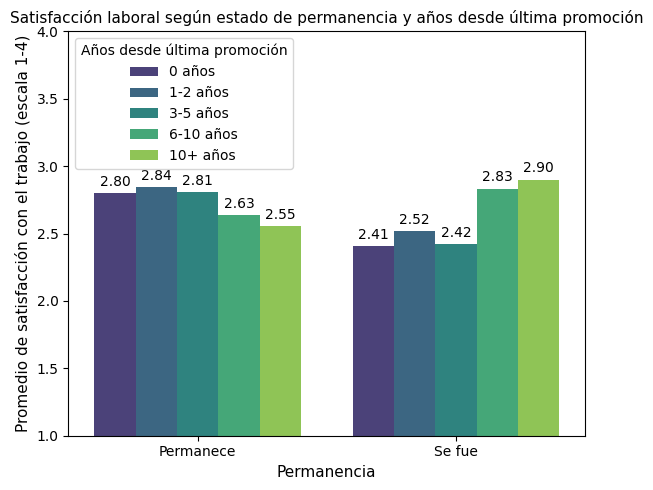

In [41]:
df['promotion_range'] = pd.cut(
    df['yearssincelastpromotion'],
    bins=[-1, 0, 2, 5, 10, df['yearssincelastpromotion'].max()],
    labels=['0 a√±os', '1-2 a√±os', '3-5 a√±os', '6-10 a√±os', '10+ a√±os']
)

df_promo = df[['attrition', 'promotion_range', 'jobsatisfaction']].dropna()


plt.figure(figsize=(6,5))
ax = sns.barplot(
    data=df_promo,
    x='attrition',
    y='jobsatisfaction',
    hue='promotion_range',
    palette='viridis',
    errorbar=None
)

# A√±adir etiquetas con valores a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

ax.set_title("Satisfacci√≥n laboral seg√∫n estado de permanencia y a√±os desde √∫ltima promoci√≥n", fontsize=11)
ax.set_xlabel("Permanencia", fontsize=11)
ax.set_ylabel("Promedio de satisfacci√≥n con el trabajo (escala 1-4)", fontsize=11)
ax.legend(title='A√±os desde √∫ltima promoci√≥n')
ax.set_ylim(1, 4)  
plt.tight_layout()
plt.show()

Mientras que, entre los empleados en activo se observa una relaci√≥n negativa entre la satisfacci√≥n y los a√±os desde la √∫ltima promoci√≥n, este no es el caso entre el grupo de empleados inactivos.

## JOB SATISFACTION POR TELETRABAJO

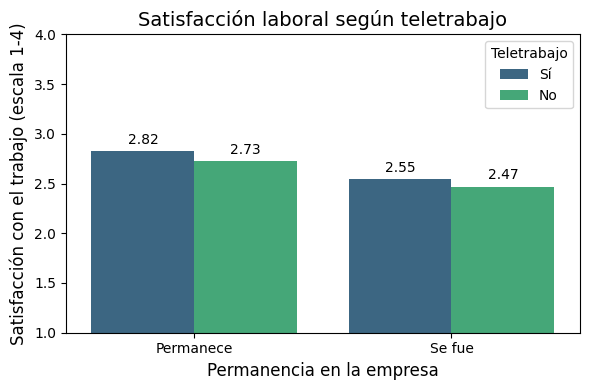

In [42]:
# Eliminar filas con nulos en columnas clave
df_remote = df[['attrition', 'remotework', 'jobsatisfaction']].dropna()

# Crear el barplot
plt.figure(figsize=(6, 4))
ax = sns.barplot(
    data=df_remote,
    x='attrition',
    y='jobsatisfaction',
    hue='remotework',
    palette='viridis',
    errorbar=None,

)

# A√±adir etiquetas con valores a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

# Personalizar
ax.set_title("Satisfacci√≥n laboral seg√∫n teletrabajo", fontsize=14)
ax.set_xlabel("Permanencia en la empresa", fontsize=12)
ax.set_ylabel("Satisfacci√≥n con el trabajo (escala 1-4)", fontsize=12)
ax.legend(title='Teletrabajo')
ax.set_ylim(1, 4)

plt.tight_layout()
plt.show()


El trabajo remoto parece estar asociado con un leve aumento en la satisfacci√≥n laboral.

## SATISFACCI√ìN AMBIENTAL SEG√öN EL G√âNERO

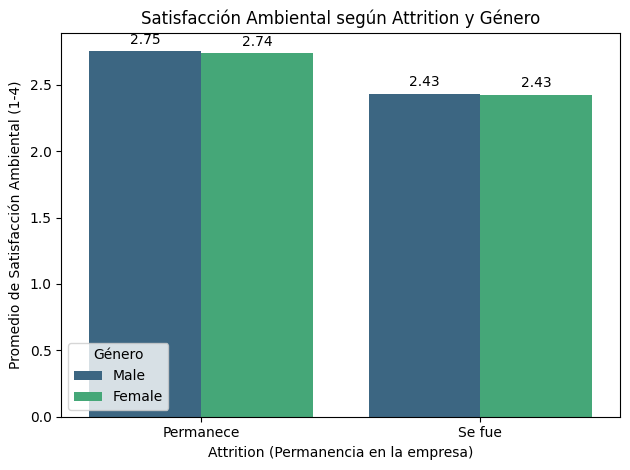

In [43]:
satisfaction_cols = [
    'attrition', 'gender', 'environmentsatisfaction'
]
df_sat = df[satisfaction_cols].dropna()

# Barplot: Eje x = Attrition, Eje y = Satisfacci√≥n relacional, hue = G√©nero
ax = sns.barplot(
    data=df_sat,
    x='attrition',
    y='environmentsatisfaction',
    hue='gender',
    palette='viridis',
    errorbar=None
)

plt.title("Satisfacci√≥n Ambiental seg√∫n Attrition y G√©nero")
plt.xlabel("Attrition (Permanencia en la empresa)")
plt.ylabel("Promedio de Satisfacci√≥n Ambiental (1-4)")
plt.legend(title='G√©nero')

# A√±adir etiquetas con valores a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

Tanto hombres como mujeres que permanecen en la empresa muestran niveles m√°s altos de satisfacci√≥n ambiental.

La diferencia por g√©nero es m√≠nima, lo que sugiere que el g√©nero no es un gran factor diferenciador en satisfacci√≥n ambiental.

## SATISFACCI√ìN RELACIONAL POR G√âNERO

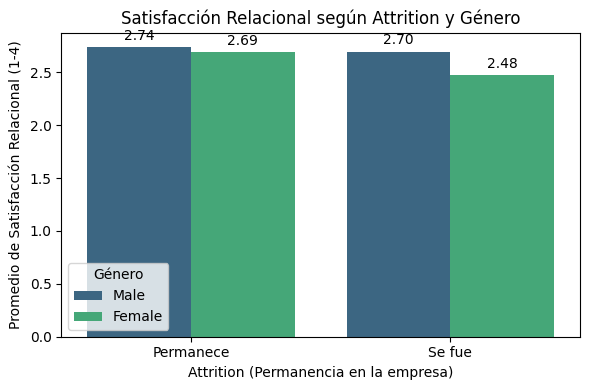

In [44]:
satisfaction_cols = [
    'attrition', 'gender', 'relationshipsatisfaction'
]
df_sat = df[satisfaction_cols].dropna()

# Barplot: Eje x = Attrition, Eje y = Satisfacci√≥n relacional, hue = G√©nero
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=df_sat, x='attrition', y='relationshipsatisfaction', hue='gender', palette='viridis', errorbar=None)

# A√±adir etiquetas con valores a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)


plt.title("Satisfacci√≥n Relacional seg√∫n Attrition y G√©nero")
plt.xlabel("Attrition (Permanencia en la empresa)")
plt.ylabel("Promedio de Satisfacci√≥n Relacional (1-4)")
plt.legend(title='G√©nero')
plt.tight_layout()
plt.show()

- Quienes permanecen muestran una mayor satisfacci√≥n relacional.
-  La diferencia de satisfacci√≥n por g√©nero es ligera. Mayor satisfaci√≥n entre el g√©nero masculino 

## SATISFACCI√ìN AMBIENTAL POR DEPARTAMENTO

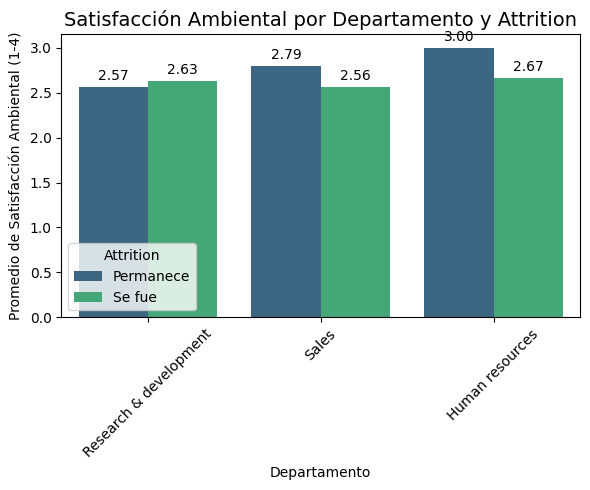

In [45]:
df_dep = df[['attrition', 'department', 'environmentsatisfaction']].dropna()

# 4. Crear gr√°fico
plt.figure(figsize=(6,5))
ax = sns.barplot(
    data=df_dep,
    x='department',
    y='environmentsatisfaction',
    hue='attrition',
    palette='viridis',
    errorbar=None
)

# A√±adir etiquetas con valores a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)


# 5. T√≠tulos y etiquetas
ax.set_title("Satisfacci√≥n Ambiental por Departamento y Attrition", fontsize=14)
ax.set_xlabel("Departamento", fontsize=10)
ax.set_ylabel("Promedio de Satisfacci√≥n Ambiental (1-4)", fontsize=10)
ax.legend(title='Attrition')

# 6. Rotar etiquetas si es necesario
plt.xticks(rotation=45)

# 7. Mostrar gr√°fico
plt.tight_layout()
plt.show()

El Executive Team muestra una ca√≠da dr√°stica en satisfacci√≥n ambiental entre quienes se fueron.

En todos los departamentos, la satisfacci√≥n ambiental tiende a ser menor entre quienes abandonan la empresa.

## SATISFACCI√ìN RELACIONAL POR DEPARTAMENTO

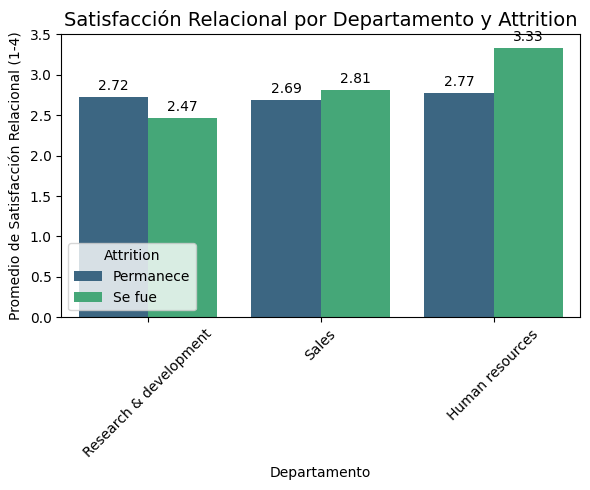

In [46]:
df_dep = df[['attrition', 'department', 'relationshipsatisfaction']].dropna()

# 4. Crear gr√°fico
plt.figure(figsize=(6,5))
ax = sns.barplot(
    data=df_dep,
    x='department',
    y='relationshipsatisfaction',
    hue='attrition',
    palette='viridis',
    errorbar=None
)

# A√±adir etiquetas con valores a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

# 5. T√≠tulos y etiquetas
ax.set_title("Satisfacci√≥n Relacional por Departamento y Attrition", fontsize=14)
ax.set_xlabel("Departamento", fontsize=10)
ax.set_ylabel("Promedio de Satisfacci√≥n Relacional (1-4)", fontsize=10)
ax.legend(title='Attrition')

# 6. Rotar etiquetas si es necesario
plt.xticks(rotation=45)

# 7. Mostrar gr√°fico
plt.tight_layout()
plt.show()

En la mayor√≠a de los departamentos, las personas que se fueron estaban menos satisfechas relacionalmente.

El caso del Executive Team destaca por ser contrario a esta tendencia, posiblemente por otras razones o tama√±o reducido de muestra.

## SATISFACCI√ìN AMBIENTAL POR A√ëOS EN EL PUESTO

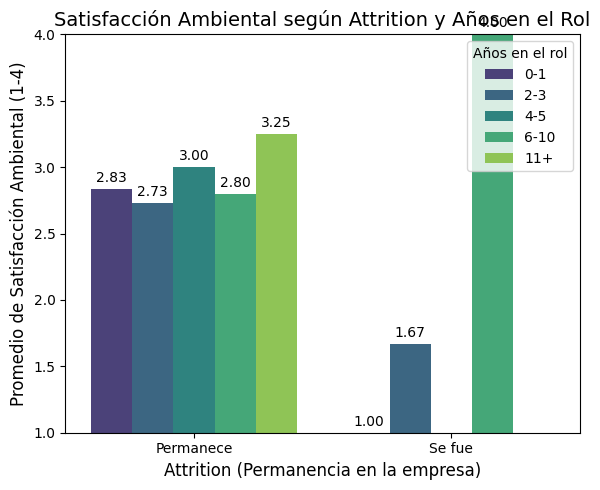

In [47]:
# Crear categor√≠as por a√±os en el rol
df['a√±os_en_rol'] = pd.cut(
    df['yearsincurrentrole'],
    bins=[-1, 1, 3, 5, 10, df['yearsincurrentrole'].max()],
    labels=['0-1', '2-3', '4-5', '6-10', '11+']
)

# Filtrar y limpiar
df_role = df[['attrition', 'a√±os_en_rol', 'environmentsatisfaction']].dropna()

# Crear gr√°fico
plt.figure(figsize=(6,5))
ax = sns.barplot(
    data=df_role,
    x='attrition',
    y='environmentsatisfaction',
    hue='a√±os_en_rol',
    palette='viridis',
    errorbar=None
)

# A√±adir etiquetas con valores a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

# Etiquetas
ax.set_title("Satisfacci√≥n Ambiental seg√∫n Attrition y A√±os en el Rol", fontsize=14)
ax.set_xlabel("Attrition (Permanencia en la empresa)", fontsize=12)
ax.set_ylabel("Promedio de Satisfacci√≥n Ambiental (1-4)", fontsize=12)
ax.legend(title='A√±os en el rol')
ax.set_ylim(1, 4)

plt.tight_layout()
plt.show()

A mayor antig√ºedad en el rol, mayor es la satisfacci√≥n ambiental, especialmente en quienes permanecen.

En quienes se fueron, algunos con muchos a√±os reportan buena satisfacci√≥n, otros no.

El descontento puede acumularse a lo largo de los a√±os si no se acompa√±a de crecimiento profesional

## SATISFACCI√ìN RELACIONAL POR A√ëOS EN EL PUESTO

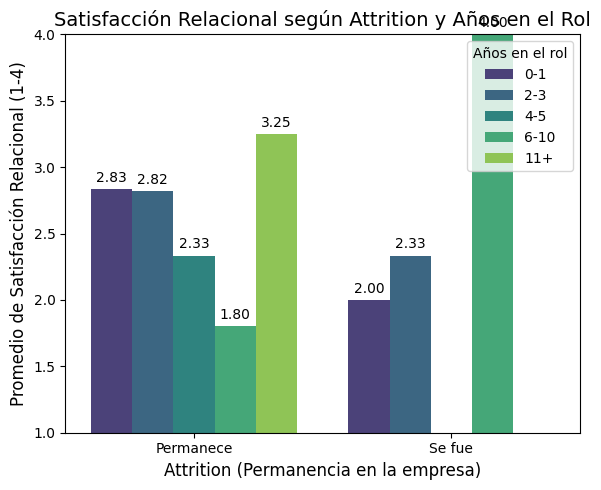

In [48]:
# Crear categor√≠as por a√±os en el rol
df['a√±os_en_rol'] = pd.cut(
    df['yearsincurrentrole'],
    bins=[-1, 1, 3, 5, 10, df['yearsincurrentrole'].max()],
    labels=['0-1', '2-3', '4-5', '6-10', '11+']
)

# Filtrar y limpiar
df_role = df[['attrition', 'a√±os_en_rol', 'relationshipsatisfaction']].dropna()

# Crear gr√°fico
plt.figure(figsize=(6,5))
ax = sns.barplot(
    data=df_role,
    x='attrition',
    y='relationshipsatisfaction',
    hue='a√±os_en_rol',
    palette='viridis',
    errorbar=None
)

# A√±adir etiquetas con valores a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

# Etiquetas
ax.set_title("Satisfacci√≥n Relacional seg√∫n Attrition y A√±os en el Rol", fontsize=14)
ax.set_xlabel("Attrition (Permanencia en la empresa)", fontsize=12)
ax.set_ylabel("Promedio de Satisfacci√≥n Relacional (1-4)", fontsize=12)
ax.legend(title='A√±os en el rol')
ax.set_ylim(1, 4)

plt.tight_layout()
plt.show()

Quienes tienen entre 6-10 a√±os en el rol y permanecen, reportan la menor satisfacci√≥n relacional.

Algunos empleados con m√°s de 11 a√±os que se fueron reportan alta satisfacci√≥n relacional.

Esto podr√≠a deberse a otros factores (como oportunidades de crecimiento).

## SATISFACCI√ìN AMBIENTAL POR A√ëOS DESDE EL √öLTIMO ASCENSO

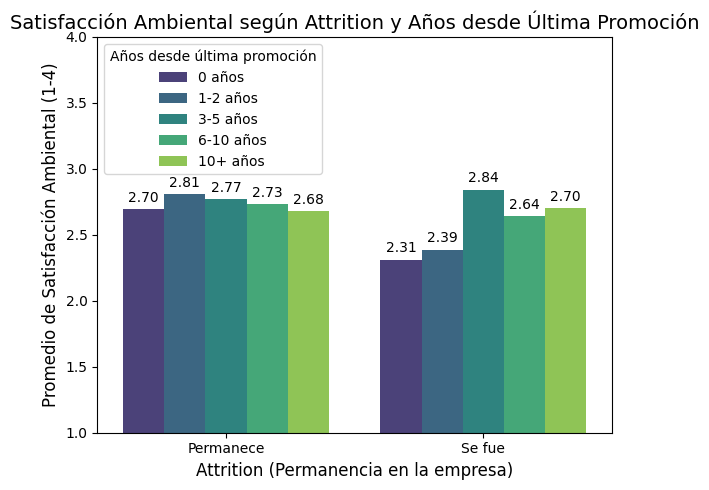

In [49]:
df['promotion_range'] = pd.cut(
    df['yearssincelastpromotion'],
    bins=[-1, 0, 2, 5, 10, df['yearssincelastpromotion'].max()],
    labels=['0 a√±os', '1-2 a√±os', '3-5 a√±os', '6-10 a√±os', '10+ a√±os']
)

df_promo = df[['attrition', 'promotion_range', 'environmentsatisfaction']].dropna()


plt.figure(figsize=(6,5))
ax = sns.barplot(
    data=df_promo,
    x='attrition',
    y='environmentsatisfaction',
    hue='promotion_range',
    palette='viridis',
    errorbar=None
)

# A√±adir etiquetas con valores a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

ax.set_title("Satisfacci√≥n Ambiental seg√∫n Attrition y A√±os desde √öltima Promoci√≥n", fontsize=14)
ax.set_xlabel("Attrition (Permanencia en la empresa)", fontsize=12)
ax.set_ylabel("Promedio de Satisfacci√≥n Ambiental (1-4)", fontsize=12)
ax.legend(title='A√±os desde √∫ltima promoci√≥n')
ax.set_ylim(1, 4)  
plt.tight_layout()
plt.show()

Entre quienes permanecen, hay satisfacci√≥n pareja independiente a los a√±os desde la √∫ltima promoci√≥n.

Entre quienes se fueron, la satisfacci√≥n aumenta si han pasado 3-5 a√±os desde la √∫ltima promoci√≥n.

Una promoci√≥n relativamente reciente puede suavizar el descontento, incluso si luego se decide salir.

## SATISFACCI√ìN RELACIONAL POR A√ëOS DESDE EL √öLTIMO ASCENSO

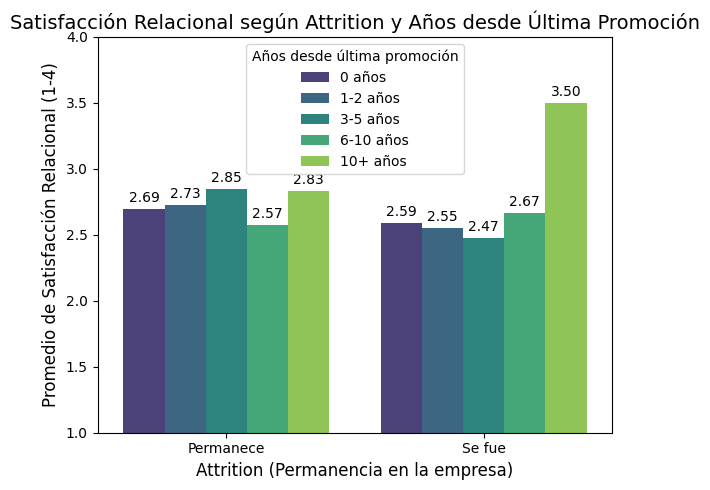

In [50]:
df['promotion_range'] = pd.cut(
    df['yearssincelastpromotion'],
    bins=[-1, 0, 2, 5, 10, df['yearssincelastpromotion'].max()],
    labels=['0 a√±os', '1-2 a√±os', '3-5 a√±os', '6-10 a√±os', '10+ a√±os']
)

df_promo = df[['attrition', 'promotion_range', 'relationshipsatisfaction']].dropna()


plt.figure(figsize=(6,5))
ax = sns.barplot(
    data=df_promo,
    x='attrition',
    y='relationshipsatisfaction',
    hue='promotion_range',
    palette='viridis',
    errorbar=None
)


# A√±adir etiquetas con valores a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

ax.set_title("Satisfacci√≥n Relacional seg√∫n Attrition y A√±os desde √öltima Promoci√≥n", fontsize=14)
ax.set_xlabel("Attrition (Permanencia en la empresa)", fontsize=12)
ax.set_ylabel("Promedio de Satisfacci√≥n Relacional (1-4)", fontsize=12)
ax.legend(title='A√±os desde √∫ltima promoci√≥n')
ax.set_ylim(1, 4)  
plt.tight_layout()
plt.show()

Empleados recientemente ascendidos (0 a√±os) muestran mayor satisfacci√≥n y tienden a permanecer m√°s en la empresa.

A medida que aumentan los a√±os sin promoci√≥n, la satisfacci√≥n disminuye levemente.

Los que se fueron tienden a agruparse en los rangos m√°s largos sin promoci√≥n (6-10 y 10+ a√±os), con una satisfacci√≥n m√°s baja.

## SATISFACCI√ìN AMBIENTAL POR TELETRABAJO

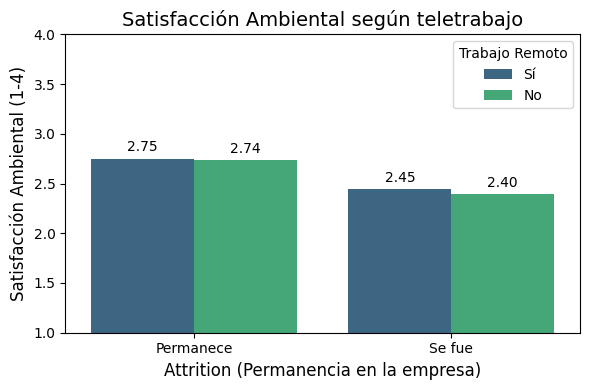

In [51]:
# Eliminar filas con nulos en columnas clave
df_remote = df[['attrition', 'remotework', 'environmentsatisfaction']].dropna()

# Crear el barplot
plt.figure(figsize=(6, 4))
ax = sns.barplot(
    data=df_remote,
    x='attrition',
    y='environmentsatisfaction',
    hue='remotework',
    palette='viridis',
    errorbar=None
)

# A√±adir etiquetas con valores a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

# Personalizar
ax.set_title("Satisfacci√≥n Ambiental seg√∫n teletrabajo", fontsize=14)
ax.set_xlabel("Attrition (Permanencia en la empresa)", fontsize=12)
ax.set_ylabel("Satisfacci√≥n Ambiental (1-4)", fontsize=12)
ax.legend(title='Trabajo Remoto')
ax.set_ylim(1, 4)

plt.tight_layout()
plt.show()

El teletrabajo no tiene un impacto significativo en la satisfacci√≥n ambiental.

Los niveles son similares tanto para quienes tienen trabajo remoto como para quienes no.

## SATISFACCI√ìN RELACIONAL POR TELETRABAJO

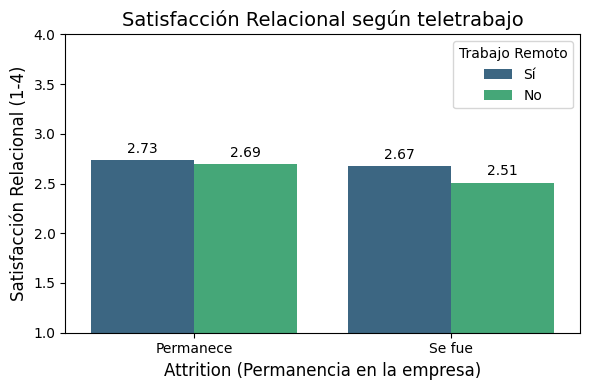

In [52]:
df_remote2 = df[['attrition', 'remotework', 'relationshipsatisfaction']].dropna()

plt.figure(figsize=(6, 4))
ax = sns.barplot(
    data=df_remote2,
    x='attrition',
    y='relationshipsatisfaction',
    hue='remotework',
    palette='viridis',
    errorbar=None
)

# Personalizar
ax.set_title("Satisfacci√≥n Relacional seg√∫n teletrabajo", fontsize=14)
ax.set_xlabel("Attrition (Permanencia en la empresa)", fontsize=12)
ax.set_ylabel("Satisfacci√≥n Relacional (1-4)", fontsize=12)
ax.legend(title='Trabajo Remoto')
ax.set_ylim(1, 4)

# A√±adir etiquetas con valores a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)


plt.tight_layout()
plt.show()

El trabajo remoto podr√≠a estar asociado con mayor satisfacci√≥n relacional, especialmente entre quienes permanecen.

La combinaci√≥n de "no trabajar en remoto" y "haber dejado la empresa" muestra la peor satisfacci√≥n, lo que puede sugerir un posible factor de riesgo.

Esto podr√≠a apuntar a que el entorno de trabajo remoto mejora la percepci√≥n de relaciones interpersonales, o que los empleados con m√°s autonom√≠a y flexibilidad perciben mejor el ambiente relacional.

## SATISFACCI√ìN AMBIENTAL POR TELETRABAJO

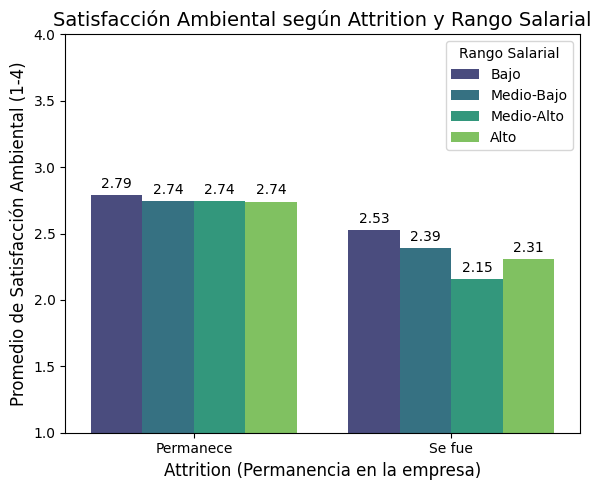

In [53]:
# Agrupar los salarios en 4 rangos (cuartiles)
df['salary_range'] = pd.qcut(df['salary'], q=4, labels=['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto'])

# Eliminar filas con valores nulos en las columnas necesarias
df_salary = df[['attrition', 'salary_range', 'environmentsatisfaction']].dropna()

plt.figure(figsize=(6,5))
ax = sns.barplot(
    data=df_salary,
    x='attrition',
    y='environmentsatisfaction',
    hue='salary_range',
    palette='viridis',
    errorbar=None
)

# A√±adir etiquetas con valores a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

ax.set_title("Satisfacci√≥n Ambiental seg√∫n Attrition y Rango Salarial", fontsize=14)
ax.set_xlabel("Attrition (Permanencia en la empresa)", fontsize=12)
ax.set_ylabel("Promedio de Satisfacci√≥n Ambiental (1-4)", fontsize=12)
ax.legend(title='Rango Salarial')
ax.set_ylim(1, 4)  # Fijamos los l√≠mites del eje Y para mejorar la comparaci√≥n

plt.tight_layout()
plt.show()

Los empleados con salarios m√°s bajos que permanecen muestran una satisfacci√≥n similar pero levemente superior a los de rango m√°s alto.

Sin embargo, entre quienes se fueron, la satisfacci√≥n cae en todos los rangos, siendo m√°s baja en el grupo de salario alto.

Esto podr√≠a sugerir que personas con mayores ingresos tienen m√°s posibilidades de cambiar de empleo si no est√°n satisfechas.

## SATISFACCI√ìN RELACIONAL POR SALARIO

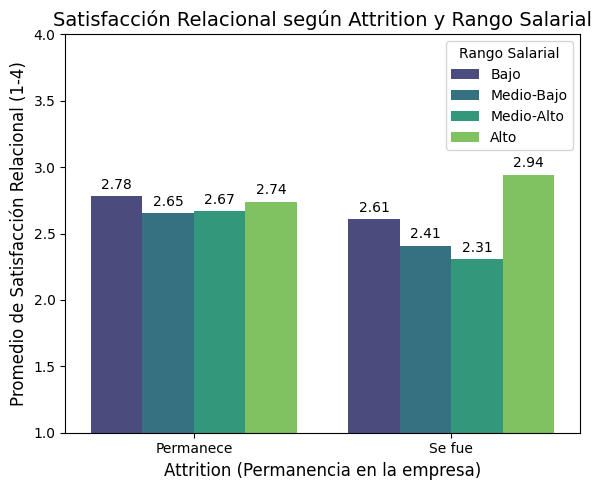

In [54]:
# Agrupar los salarios en 4 rangos (cuartiles)
df['salary_range'] = pd.qcut(df['salary'], q=4, labels=['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto'])

# Eliminar filas con valores nulos en las columnas necesarias
df_salary = df[['attrition', 'salary_range', 'relationshipsatisfaction']].dropna()

plt.figure(figsize=(6,5))
ax = sns.barplot(
    data=df_salary,
    x='attrition',
    y='relationshipsatisfaction',
    hue='salary_range',
    palette='viridis',
    errorbar=None
)


# A√±adir etiquetas con valores a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

ax.set_title("Satisfacci√≥n Relacional seg√∫n Attrition y Rango Salarial", fontsize=14)
ax.set_xlabel("Attrition (Permanencia en la empresa)", fontsize=12)
ax.set_ylabel("Promedio de Satisfacci√≥n Relacional (1-4)", fontsize=12)
ax.legend(title='Rango Salarial')
ax.set_ylim(1, 4)  # Fijamos los l√≠mites del eje Y para mejorar la comparaci√≥n

plt.tight_layout()
plt.show()

El salario parece influir positivamente en la satisfacci√≥n relacional.

Los empleados con salario bajo y menor satisfacci√≥n son los m√°s propensos a irse.

Es posible que una mejora salarial tenga un efecto indirecto positivo sobre el ambiente relacional, retenci√≥n y bienestar.

# üìä Resumen de Conclusiones e Insights
## 1. Alta Retenci√≥n de Empleados
84.9% de los empleados siguen activos en la empresa.

Esto indica una buena estabilidad laboral, aunque ser√≠a interesante analizar los motivos de salida del 15.1% restante.

## 2. Teletrabajo como Pr√°ctica Com√∫n
61.7% de los empleados teletrabajan.

Esta pol√≠tica parece ya implementada de forma efectiva y podr√≠a seguir ampli√°ndose para mejorar la calidad de vida.

## 3. Distancia al Trabajo
61.5% de los empleados viven a m√°s de 5 millas del lugar de trabajo.

De ellos, un 60% teletrabaja, lo que sugiere que el teletrabajo est√° ayudando a mitigar los efectos de largas distancias.

## 4. Salario y Roles
Los Managers cobran significativamente m√°s que otros puestos dentro de un mismo departamento.

El rol de Research Director tambi√©n destaca por su alto salario.

## 5. Diferencias Salariales por G√©nero
En general, los salarios son similares por g√©nero, excepto en Recursos Humanos, donde las mujeres ganan menos en promedio.

Esto puede reflejar una brecha salarial de g√©nero localizada.

## 6. Educaci√≥n y Salario
Existe una relaci√≥n directa: a mayor nivel educativo (escala del 1 al 5), mayor salario promedio.

## 7. Antig√ºedad y Retribuci√≥n
16.5% de los empleados llevan m√°s de 10 a√±os en la empresa.

Este grupo es tambi√©n el que mejor salario promedio tiene.

## 8. Entrenamiento y Desempe√±o
No se observa correlaci√≥n significativa entre las sesiones de entrenamiento y el nivel de desempe√±o ni con el salario.

Esto sugiere que las formaciones actuales no est√°n optimizando el rendimiento evaluado.

## 9. Experiencia Media por G√©nero
Hombres y mujeres tienen experiencia similar (~11 a√±os), por lo tanto, la antig√ºedad no explica diferencias salariales por g√©nero.

# üí° Recomendaciones para la Empresa
## 1. Recoger Datos M√°s Contextuales
Incluir informaci√≥n como:

N√∫mero de hijos o personas a cargo, para evaluar pol√≠ticas de conciliaci√≥n familiar.

Fecha exacta de la recogida de datos, para facilitar comparativas interanuales y evoluci√≥n temporal.

## 2. Auditor√≠a Salarial
Realizar una revisi√≥n espec√≠fica del departamento de Recursos Humanos para detectar posibles brechas salariales de g√©nero y aplicar planes correctivos si es necesario.

## 3. Evaluaci√≥n de Formaci√≥n
Revisar la efectividad del plan de formaci√≥n:

Incluir feedback post-formaci√≥n.

Medir el impacto en objetivos claros de rendimiento.

Establecer una correlaci√≥n directa entre formaci√≥n y promoci√≥n/desempe√±o.

## 4. Optimizar Pol√≠ticas de Teletrabajo
Expandir las posibilidades de teletrabajo especialmente en los empleados que viven lejos y que actualmente no lo hacen.

Evaluar la posibilidad de crear un modelo h√≠brido flexible.

## 5. Planes de Desarrollo por Antig√ºedad
Aprovechar la experiencia del personal senior (>10 a√±os) para programas de mentor√≠a y transmisi√≥n de conocimiento.

Fomentar la retenci√≥n de talento ofreciendo oportunidades de desarrollo y reconocimiento a medio-largo plazo.

## 6. Monitoreo Continuo
Establecer una pol√≠tica de actualizaci√≥n peri√≥dica de datos (por ejemplo, cada 6 o 12 meses).

Automatizar la recogida de m√©tricas clave de RRHH (rotaci√≥n, desempe√±o, clima laboral, etc.).